In [1]:
from os import getcwd
from os.path import dirname
import torch
from torch.distributions import multivariate_normal
from torch.distributions import uniform

from algorithm_package.algorithm_package import paper_algorithm
from energy_package.energy_package import two_param
#from energy_package.energy_package import XY
#from energy_package.energy_package import particle_pairwise_interaction
from rf_package.rf_package import planar_flow
from plot_animation_package.plot_animation_package import density_2D
#from plot_animation_package.plot_animation_package import XYd2n2
#from plot_animation_package.plot_animation_package import XYd2n1
#from plot_animation_package.plot_animation_package import XYd2n3
#from plot_animation_package.plot_animation_package import particle_pairwise_interaction_plot


In [2]:
import torch
from torch.distributions.uniform import Uniform

class MultivariateUniform(Uniform):
    def __init__(self, low, high, data_dim):
        super(MultivariateUniform, self).__init__(low, high)
        self.data_dim = data_dim

    def sample(self):
        return super().sample(torch.Size([self.data_dim]))

    def log_prob(self, value):
        if value.dim() < 1 or value.size(-1) != self.data_dim:
            raise ValueError("Last dimension of value must be of size data_dim")

        # Calculate log_prob for each dimension and sum them
        log_prob_per_dim = super().log_prob(value)
        return log_prob_per_dim.sum(-1)

import torch
from torch.autograd import grad

# Create a MultivariateUniform distribution instance
data_dim = 3
low = torch.tensor(0.0, requires_grad=True)
high = torch.tensor(1.0, requires_grad=True)
uniform_dist = MultivariateUniform(low, high, data_dim)

# Generate a sample
sample = uniform_dist.sample()

# Compute log probability
log_prob = uniform_dist.log_prob(sample)

# Calculate gradients
gradient_low = grad(log_prob, low, retain_graph=True)[0]
gradient_high = grad(log_prob, high)[0]

print("Sample:", sample)
print("Log Probability:", log_prob)
print("Gradient with respect to low:", gradient_low)
print("Gradient with respect to high:", gradient_high)


Sample: tensor([0.1198, 0.2261, 0.9949])
Log Probability: tensor(0., grad_fn=<SumBackward1>)
Gradient with respect to low: tensor(3.)
Gradient with respect to high: tensor(-3.)


In [4]:
# MODEL PARAMETERS
N = 20 #number of particles
dimensions = 2 #dimensions of the model space
data_dim = N*dimensions #size of the parameter space
beta = 1
#U = two_param.bistable_circle
#BC = two_param.bistable_circle_BC
#U = particle_pairwise_interaction.U
#BC = particle_pairwise_interaction.BC

U = two_param.bistable_circle
BC = two_param.bistable_circle_BC

energy_parameters = []

# SAVING PARAMETER
model_name = 'bistable_circle-multivariate_normal-LayeredPlanarFlow-beta1'
model_file = getcwd()+"\\saved_models"+"\\"+model_name+"\\"+model_name

# RF PARAMETERS
n = 200 #number of initial samples

#base_distribution = MultivariateUniform(-10, 10, data_dim)
base_distribution = multivariate_normal.MultivariateNormal(loc=torch.ones(data_dim), covariance_matrix=torch.eye(data_dim))
normalization_flow = planar_flow.LayeredPlanarFlow(data_dim)
epsilon = 2e-2 #gradient descent rate for RF parameters

# MALA PARAMETERS
time_step = 1e-3
k_lang = 10

# INITIALISATION
initial_data = torch.rand(n*data_dim).reshape(n,data_dim)*2*torch.pi
k_max = 100

# RUN
RF_MCMC_parameters = [time_step, k_max, k_lang, epsilon]
history, array_of_model_configurations = paper_algorithm.NF_MCMC_algorithm(model_name, beta, U, BC, energy_parameters, normalization_flow, initial_data, base_distribution, *RF_MCMC_parameters)

  0%|          | 0/99 [00:00<?, ?it/s]

c:\Users\samue\Documents\GitHub\ML_project\Adaptative-monte-carlo-augmented-with-normalizing-flows\rf_package\rf_package\planar_flow.py:22: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3575.)
  wu = torch.matmul(self.w.T, self.u)
100%|██████████| 99/99 [02:22<00:00,  1.44s/it]


In [11]:
model_name = 'bistable_circle-multivariate_normal-LayeredPlanarFlow-beta1'
model_file = getcwd()+"\\saved_models"+"\\"+model_name+"\\"+model_name+'.pt'

print(model_file)

c:\Users\samue\Documents\GitHub\ML_project\Adaptative-monte-carlo-augmented-with-normalizing-flows\saved_models\bistable_circle-multivariate_normal-LayeredPlanarFlow-beta1\bistable_circle-multivariate_normal-LayeredPlanarFlow-beta1.pt


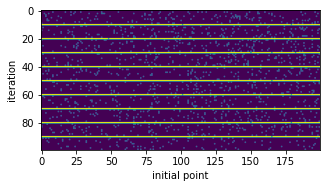

In [12]:
import matplotlib.pyplot as plt
path = dirname(model_file)
history = torch.load(path + '\\history.pt').detach()

fig, ax = plt.subplots(figsize = (5,10))
ax.imshow(history)
ax.set_xlabel('initial point')
ax.set_ylabel('iteration')
fig.savefig(path + '\\history.png')

In [9]:
model_name = 'XYd2n3-multivariate_normal-LayeredPlanarFlow-beta1'
model_file = getcwd()+"\\saved_models"+"\\"+model_name+"\\"+model_name+'.pt'
trajectory_id = 0
path = dirname(model_file)
history = torch.load(path + '\\history.pt').detach()
particle_pairwise_interaction_plot.animation(model_file, trajectory_id, history)

NameError: name 'particle_pairwise_interaction_plot' is not defined

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x40 and 2x40000)

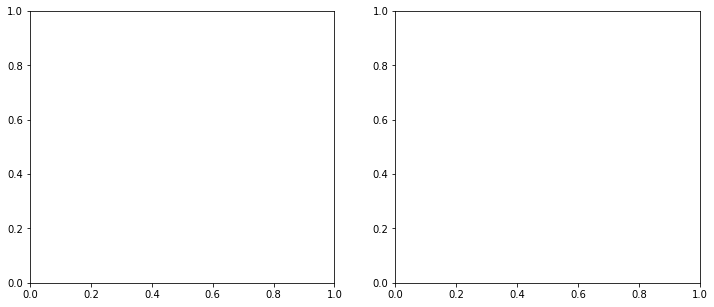

In [15]:
from plot_animation_package.plot_animation_package import density_2D
model_file=r'C:\Users\samue\Documents\GitHub\ML_project\Adaptative-monte-carlo-augmented-with-normalizing-flows\saved_models\bistable_circle-multivariate_normal-LayeredPlanarFlow-beta1\model.pt'
density_2D.plot(beta, U, energy_parameters, model_file, normalization_flow, base_distribution)

1